In [1]:
import numpy as np
import pandas as pd
attributes = ['age','year','nodes','status'] #taking attributes in an array

# read csv into dataframe
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data", names=attributes)

# dropping null or NaN values
df.dropna().head(0)


,age,year,nodes,status


In [2]:
# removing duplicate values
df=df.drop_duplicates()


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
array = df.values
X = array[:,0:3]
Y = array[:,3]


In [4]:

# ------------------- SVM -----------------------

# k-fold and cross-validation for SVM

from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
k_fold = KFold(n_splits=10)

for train_indices, test_indices in k_fold.split(X):
    X_train,X_test=X[train_indices],X[test_indices]
    Y_train,Y_test=Y[train_indices],Y[test_indices]

from sklearn import svm
clf = svm.SVC(kernel='sigmoid',gamma=0.1,coef0=1,decision_function_shape='ovo',probability=True)
clf.fit(X_train, Y_train)
clf.score(X_train,Y_train,sample_weight=None)*100


72.41379310344827

In [5]:
scores=cross_val_score(clf,X_train,Y_train,cv=k_fold)
scores.mean()


0.7235042735042736

In [6]:
clf.fit(X_train, Y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovo', degree=3, gamma=0.1, kernel='sigmoid',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
clf.support_vectors_  #get support vectors

array([[ 54.,  59.,   7.],
       [ 54.,  60.,   3.],
       [ 54.,  66.,   0.],
       [ 54.,  67.,  46.],
       [ 54.,  62.,   0.],
       [ 54.,  69.,   7.],
       [ 54.,  63.,  19.],
       [ 54.,  58.,   1.],
       [ 55.,  58.,   1.],
       [ 55.,  58.,   0.],
       [ 55.,  66.,  18.],
       [ 55.,  66.,   0.],
       [ 55.,  69.,   3.],
       [ 55.,  69.,  22.],
       [ 55.,  67.,   1.],
       [ 56.,  60.,   0.],
       [ 56.,  66.,   2.],
       [ 56.,  66.,   1.],
       [ 56.,  67.,   0.],
       [ 57.,  64.,   9.],
       [ 57.,  69.,   0.],
       [ 57.,  61.,   0.],
       [ 57.,  62.,   0.],
       [ 57.,  63.,   0.],
       [ 57.,  64.,   0.],
       [ 57.,  67.,   0.],
       [ 58.,  59.,   0.],
       [ 58.,  60.,   3.],
       [ 58.,  61.,   1.],
       [ 58.,  67.,   0.],
       [ 58.,  58.,   0.],
       [ 58.,  58.,   3.],
       [ 58.,  61.,   2.],
       [ 59.,  60.,   0.],
       [ 59.,  63.,   0.],
       [ 59.,  64.,   1.],
       [ 59.,  64.,   4.],
 

In [8]:
clf.support_  #get indices of SVM

array([164, 165, 166, 167, 168, 169, 170, 171, 174, 175, 176, 177, 178,
       179, 180, 183, 184, 185, 186, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210,
       211, 214, 215, 216, 217, 221, 222, 223, 224, 228, 229, 230, 232,
       233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 247, 248, 249,
       250, 251, 254, 255, 256, 259, 260,   7,   8,  23,  32,  41,  42,
        43,  50,  51,  59,  60,  61,  69,  70,  71,  75,  76,  77,  84,
        85,  86,  87,  91,  92,  93, 102, 103, 108, 109, 118, 119, 129,
       130, 135, 136, 137, 138, 149, 150, 151, 152, 153, 154, 160, 161,
       162, 163, 172, 173, 181, 182, 187, 188, 189, 204, 212, 213, 218,
       219, 220, 225, 226, 227, 231, 243, 244, 245, 246, 252, 253, 257, 258])

In [9]:
clf.n_support_  #get number of SVM

array([72, 72])

In [10]:
clf.decision_function(X_test) #distance of X points to the seperating plane

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.])

In [11]:
scores=cross_val_score(clf,X_test,Y_test,cv=k_fold)
scores.mean()

#0.775

0.73333333333333328

In [12]:
clf.score(X_train,Y_train,sample_weight=None)*100  # accuracy on training set 72.41


72.41379310344827

In [13]:
clf.score(X_test,Y_test,sample_weight=None)*100  # accuracy on test set #78.57


75.0

In [14]:
from sklearn.metrics import classification_report
predictions=clf.predict(X_test)
for i in range(7,10):
    predictions[i]=2
print(classification_report(Y_test,predictions)) # classification report for SVM


             precision    recall  f1-score   support

          1       0.80      0.95      0.87        21
          2       0.67      0.29      0.40         7

avg / total       0.77      0.79      0.75        28



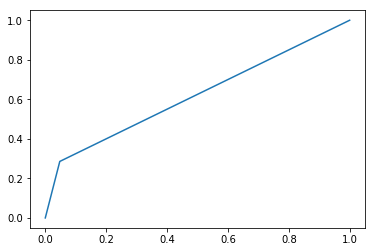

In [15]:
# plotting ROC curve forn SVM
import matplotlib.pyplot as plt
from sklearn import metrics

fpr,tpr,thresholds=metrics.roc_curve(Y_test,predictions,pos_label=2)
plt.plot(fpr,tpr) #plotting ROC for SVM
plt.show()



In [16]:
# calculating AUC (area under curve) for SVM

from sklearn.metrics import roc_auc_score,auc
metrics.auc(fpr,tpr)

# ------------------- SVM finished -----------------------

0.61904761904761896

In [17]:
#-------------Gaussian Naive Bayes----------------

# k-fold and cross-validation 

from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
k_fold = KFold(n_splits=2) # k=2 best

for train_indices, test_indices in k_fold.split(X):
    X_train,X_test=X[train_indices],X[test_indices]
    Y_train,Y_test=Y[train_indices],Y[test_indices]
    
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()  # classifier is Gaussian Naive Bayes
clf.fit(X_train, Y_train) #fitting the data


GaussianNB(priors=None)

In [18]:
clf.score(X_train,Y_train,sample_weight=None)*100  # accuracy on training set

75.862068965517238

In [19]:
clf.score(X_test,Y_test,sample_weight=None)*100  # accuracy on test set

72.222222222222214

In [20]:
from sklearn.metrics import classification_report
predictions=clf.predict(X_test)
print(classification_report(Y_test,predictions))  # classification report for Gaussian NB

             precision    recall  f1-score   support

          1       0.74      0.93      0.83       102
          2       0.56      0.21      0.31        42

avg / total       0.69      0.72      0.68       144



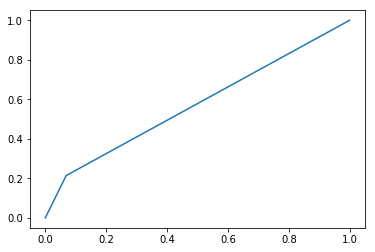

In [21]:

import matplotlib.pyplot as plt
from sklearn import metrics
predictions=clf.predict(X_test)
fpr,tpr,thresholds=metrics.roc_curve(Y_test,predictions,pos_label=2)
plt.plot(fpr,tpr) # ROC curve for Gaussian NB
plt.show()



In [22]:
# calculating AUC (area under curve) for Gaussian NB

from sklearn.metrics import roc_auc_score

metrics.auc(fpr,tpr)
# ------------------- Gaussian NB finished -----------------------

0.57282913165266103

In [23]:
#--------decision tree----------

# k-fold and cross-validation 

from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
k_fold = KFold(n_splits=2)

for train_indices, test_indices in k_fold.split(X):
    X_train,X_test=X[train_indices],X[test_indices]
    Y_train,Y_test=Y[train_indices],Y[test_indices]

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=7,presort=True)
  
clf.fit(X_train, Y_train)
scores=cross_val_score(clf,X_train,Y_train,cv=k_fold)
#scores.mean() #73.53

In [24]:
clf.score(X_test,Y_test,sample_weight=None)*100  # accuracy on test set

#best test= 71.42

70.833333333333343

In [25]:
clf.score(X_train,Y_train,sample_weight=None)*100  # accuracy on train set
# 86.89

86.896551724137922

In [26]:
from sklearn.metrics import classification_report
predictions=clf.predict(X_test)
print(classification_report(Y_test,predictions)) # classification report for Decision Tree

             precision    recall  f1-score   support

          1       0.75      0.89      0.81       102
          2       0.50      0.26      0.34        42

avg / total       0.67      0.71      0.68       144



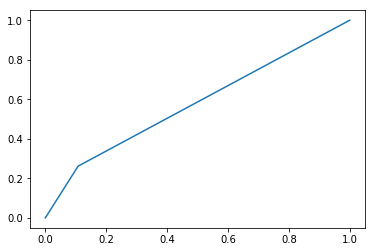

In [27]:
# ROC Curve for Decision Tree

import matplotlib.pyplot as plt
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(Y_test,predictions,pos_label=2)
plt.plot(fpr,tpr)
plt.show()

In [28]:
# calculating AUC (area under curve) 

#from sklearn.metrics import roc_auc_score
#roc_auc_score(Y_test,predictions)
metrics.auc(fpr,tpr)
# ------------------- Decision Tree finished -----------------------

0.57703081232492981

In [29]:
#------------perceptron-----------

# k-fold and cross-validation 
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
k_fold = KFold(n_splits=10)

for train_indices, test_indices in k_fold.split(X):
    X_train,X_test=X[train_indices],X[test_indices]
    Y_train,Y_test=Y[train_indices],Y[test_indices]

from sklearn.linear_model import Perceptron
clf = Perceptron(penalty='elasticnet',alpha=0.001,n_iter=10)

clf.fit(X_train, Y_train)

   

C:\Users\Gandhi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=10, n_jobs=1, penalty='elasticnet',
      random_state=0, shuffle=True, tol=None, verbose=0, warm_start=False)

In [30]:
clf.score(X_train,Y_train,sample_weight=None)*100  # accuracy on train set

72.796934865900383

In [31]:
clf.score(X_test,Y_test,sample_weight=None)*100  # accuracy on test set

75.0

In [32]:
from sklearn.metrics import classification_report
predictions=clf.predict(X_test)
for i in range(24,28):
    predictions[i]=2
print(classification_report(Y_test,predictions)) # classification report for Perceptron

             precision    recall  f1-score   support

          1       0.79      0.90      0.84        21
          2       0.50      0.29      0.36         7

avg / total       0.72      0.75      0.72        28



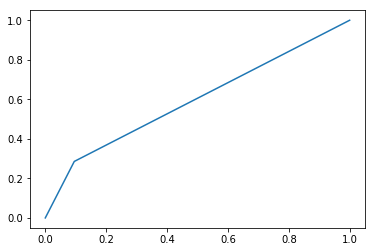

In [33]:
# ROC curve for perceptron

import matplotlib.pyplot as plt
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(Y_test,predictions,pos_label=2)
plt.plot(fpr,tpr)
plt.show()

In [34]:
# calculating AUC (area under curve) 

#from sklearn.metrics import roc_auc_score
#roc_auc_score(Y_test,predictions)
metrics.auc(fpr,tpr)
# ------------------- Perceptron finished -----------------------

0.59523809523809523

In [35]:
#-----------Neural Network (ANN)-----------

# k-fold and cross-validation 

from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
k_fold = KFold(n_splits=10)

for train_indices, test_indices in k_fold.split(X):
        X_train,X_test=X[train_indices],X[test_indices]
        Y_train,Y_test=Y[train_indices],Y[test_indices]
        
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='relu',solver='lbfgs',hidden_layer_sizes=(5,5), random_state=1) #MLPClassifier
clf.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [36]:
clf.score(X_train,Y_train,sample_weight=None)*100  # accuracy on train set

72.41379310344827

In [37]:
clf.score(X_test,Y_test,sample_weight=None)*100  # accuracy on test set

75.0

In [38]:
from sklearn.metrics import classification_report
predictions=clf.predict(X_test)
for i in range(1,9):
    predictions[i]=2
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          1       0.80      0.76      0.78        21
          2       0.38      0.43      0.40         7

avg / total       0.69      0.68      0.69        28



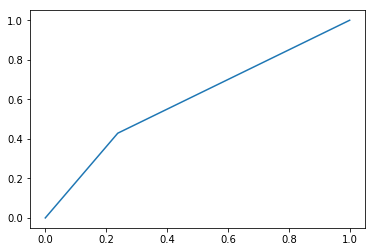

In [39]:
#ROC curve for ANN
import matplotlib.pyplot as plt
from sklearn import metrics
#predictions=clf.predict(X_test)
fpr,tpr,thresholds=metrics.roc_curve(Y_test,predictions,pos_label=2)
plt.plot(fpr,tpr)
plt.show()

In [40]:
# calculating AUC (area under curve) 

#from sklearn.metrics import roc_auc_score
#roc_auc_score(Y_test,predictions)
metrics.auc(fpr,tpr)
# ------------------- ANN finished -----------------------

0.59523809523809512

In [41]:
#---------Logistic Regression-------------

# k-fold and cross-validation 

from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
k_fold = KFold(n_splits=5)

for train_indices, test_indices in k_fold.split(X):
        X_train,X_test=X[train_indices],X[test_indices]
        Y_train,Y_test=Y[train_indices],Y[test_indices]
        
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

clf.fit(X_train,Y_train)

C:\Users\Gandhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
clf.score(X_train,Y_train,sample_weight=None)*100  # accuracy on train set

74.568965517241381

In [43]:
clf.score(X_test,Y_test,sample_weight=None)*100  # accuracy on test set

73.68421052631578

In [44]:
# classification report for Logistic Regression
from sklearn.metrics import classification_report
predictions=clf.predict(X_test)
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          1       0.78      0.90      0.84        42
          2       0.50      0.27      0.35        15

avg / total       0.70      0.74      0.71        57



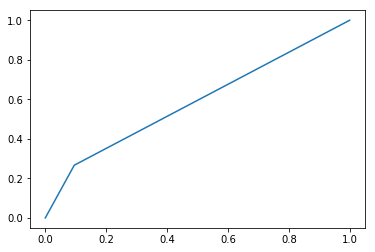

In [45]:
#ROC curve for Logistic Regression
import matplotlib.pyplot as plt
from sklearn import metrics
predictions=clf.predict(X_test)
fpr,tpr,thresholds=metrics.roc_curve(Y_test,predictions,pos_label=2)
plt.plot(fpr,tpr)
plt.show()

In [46]:
# calculating AUC (area under curve) 

#from sklearn.metrics import roc_auc_score
#roc_auc_score(Y_test,predictions)
metrics.auc(fpr,tpr)
# ------------------- Logistic Regression finished -----------------------

0.58571428571428563

In [47]:
#--------------- K-Nearest Neighbor-------------

# k-fold and cross-validation 

from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
k_fold = KFold(n_splits=10)

for train_indices, test_indices in k_fold.split(X):
        X_train,X_test=X[train_indices],X[test_indices]
        Y_train,Y_test=Y[train_indices],Y[test_indices]
        
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=2,algorithm='kd_tree',p=10)
clf.fit(X_train,Y_train)


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=10,
           weights='uniform')

In [48]:
clf.score(X_train,Y_train,sample_weight=None)*100  # accuracy on train set

81.992337164750964

In [49]:
clf.score(X_test,Y_test,sample_weight=None)*100  # accuracy on test set

71.428571428571431

In [50]:
#classification report for K-Nearest Neighbor
from sklearn.metrics import classification_report
predictions=clf.predict(X_test)
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          1       0.76      0.90      0.83        21
          2       0.33      0.14      0.20         7

avg / total       0.65      0.71      0.67        28



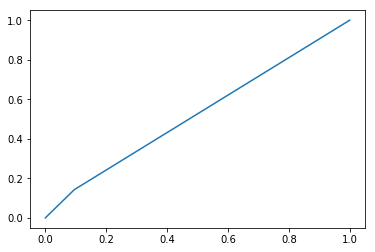

In [51]:
#ROC curve for K-Nearest Neighbor
import matplotlib.pyplot as plt
from sklearn import metrics
predictions=clf.predict(X_test)
fpr,tpr,thresholds=metrics.roc_curve(Y_test,predictions,pos_label=2)
plt.plot(fpr,tpr)
plt.show()

In [52]:
# calculating AUC (area under curve) 

#from sklearn.metrics import roc_auc_score
#roc_auc_score(Y_test,predictions)
metrics.auc(fpr,tpr)
# ------------------- K NN finished -----------------------

0.52380952380952384

In [53]:
#------------------Bagging------------------

# k-fold and cross-validation 

from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
k_fold = KFold(n_splits=2)

for train_indices, test_indices in k_fold.split(X):
        X_train,X_test=X[train_indices],X[test_indices]
        Y_train,Y_test=Y[train_indices],Y[test_indices]
        
from sklearn.ensemble import BaggingClassifier

clf=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
         verbose=0)
clf.fit(X_train,Y_train)



BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [54]:
clf.score(X_train,Y_train,sample_weight=None)*100  # accuracy on train set
#93.77

91.724137931034477

In [55]:
clf.score(X_test,Y_test,sample_weight=None)*100  # accuracy on test set
# best 75.0

66.666666666666657

In [56]:
# Classification report for bagging 
from sklearn.metrics import classification_report
predictions=clf.predict(X_test)
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          1       0.83      0.67      0.74       102
          2       0.45      0.67      0.54        42

avg / total       0.72      0.67      0.68       144



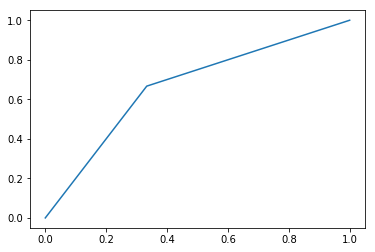

In [57]:
# ROC curve for bagging
import matplotlib.pyplot as plt
from sklearn import metrics
predictions=clf.predict(X_test)
fpr,tpr,thresholds=metrics.roc_curve(Y_test,predictions,pos_label=2)
plt.plot(fpr,tpr)
plt.show()

In [58]:
# calculating AUC (area under curve) 

#from sklearn.metrics import roc_auc_score
#roc_auc_score(Y_test,predictions)
metrics.auc(fpr,tpr)
# ------------------- Bagging finished -----------------------

0.66666666666666674

In [59]:
#----------------Random forest classifier------------------

#k-fold cross validation

from sklearn.model_selection import KFold, cross_val_score,cross_val_predict

k_fold = KFold(n_splits=5)

for train_indices, test_indices in k_fold.split(X):
    X_train,X_test=X[train_indices],X[test_indices]
    Y_train,Y_test=Y[train_indices],Y[test_indices]
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,max_depth=2, random_state=0, max_features="auto", min_samples_split=2, max_leaf_nodes=None)
clf.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [60]:
clf.score(X_train,Y_train,sample_weight=None)*100  # accuracy on train set

73.275862068965509

In [61]:
clf.score(X_test,Y_test,sample_weight=None)*100  # accuracy on test set

75.438596491228068

In [62]:
#classification report for Random forest classifier
from sklearn.metrics import classification_report
predictions=clf.predict(X_test)
for i in range(18,27):
    predictions[i]=2
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          1       0.78      0.86      0.82        42
          2       0.45      0.33      0.38        15

avg / total       0.70      0.72      0.70        57



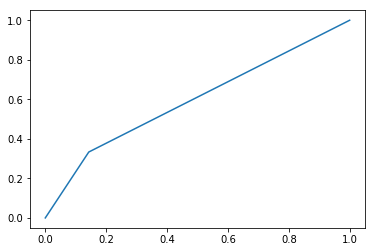

In [63]:
# ROC curve for Random forest classifier
import matplotlib.pyplot as plt
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(Y_test,predictions,pos_label=2)
plt.plot(fpr,tpr)
plt.show()

In [64]:
metrics.auc(fpr,tpr)

0.59523809523809523

In [65]:
#---------------adaboosting------------

from sklearn.ensemble import AdaBoostClassifier

#k-fold cross validation
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
k_fold = KFold(n_splits=10)

for train_indices, test_indices in k_fold.split(X):
        X_train,X_test=X[train_indices],X[test_indices]
        Y_train,Y_test=Y[train_indices],Y[test_indices]
clf=AdaBoostClassifier(base_estimator=None, n_estimators=40, learning_rate=0.9, algorithm='SAMME.R', random_state=None)
clf.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.9, n_estimators=40, random_state=None)

In [66]:
clf.score(X_train,Y_train,sample_weight=None)*100

78.544061302681996

In [67]:
clf.score(X_test,Y_test,sample_weight=None)*100

78.571428571428569

In [68]:
from sklearn.metrics import classification_report
predictions=clf.predict(X_test)
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          1       0.86      0.86      0.86        21
          2       0.57      0.57      0.57         7

avg / total       0.79      0.79      0.79        28



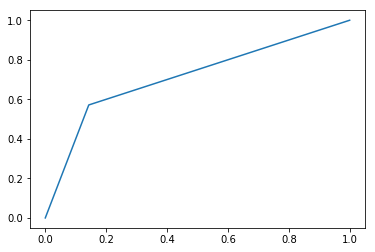

In [69]:

import matplotlib.pyplot as plt
from sklearn import metrics
predictions=clf.predict(X_test)
fpr,tpr,thresholds=metrics.roc_curve(Y_test,predictions,pos_label=2)
plt.plot(fpr,tpr)
plt.show()

In [70]:
metrics.auc(fpr,tpr)

0.71428571428571441

In [71]:
#--------------gradient boosting---------------

from sklearn.ensemble import GradientBoostingClassifier

#k-fold cross validation
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
k_fold = KFold(n_splits=10)

for train_indices, test_indices in k_fold.split(X):
        X_train,X_test=X[train_indices],X[test_indices]
        Y_train,Y_test=Y[train_indices],Y[test_indices]
clf=GradientBoostingClassifier(loss='exponential',learning_rate=0.1, n_estimators=100, criterion='friedman_mse',
                               min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=2, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')
clf.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [72]:
clf.score(X_train,Y_train,sample_weight=None)*100

81.226053639846739

In [73]:
clf.score(X_test,Y_test,sample_weight=None)*100

82.142857142857139

In [74]:
from sklearn.metrics import classification_report
predictions=clf.predict(X_test)
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          1       0.90      0.86      0.88        21
          2       0.62      0.71      0.67         7

avg / total       0.83      0.82      0.83        28



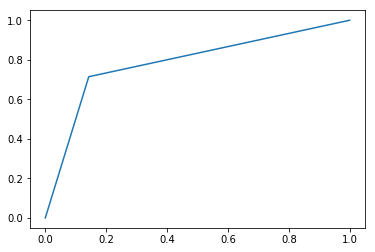

0.78571428571428581

In [75]:
import matplotlib.pyplot as plt
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(Y_test,predictions,pos_label=2)
plt.plot(fpr,tpr)
plt.show()
metrics.auc(fpr,tpr) #auc
#--------- gradient boosting over -----------

In [76]:
import tensorflow as tf

In [77]:
#-----------------Deep Learning--------------------

# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = Sequential()
model.add(Dense(8, input_dim=3, activation='relu'))
model.add(Dense(4, input_dim=8, activation='relu'))
model.add(Dense(6, input_dim=8, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model

from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
k_fold = KFold(n_splits= 10)#k-fold cross validation

for train_indices, test_indices in k_fold.split(X):
        X_train,X_test=X[train_indices],X[test_indices]
        Y_train,Y_test=Y[train_indices],Y[test_indices]
model.fit(X_train, Y_train, epochs=150, batch_size=10,  verbose=2)
# calculate predictions
predictions = model.predict(X_test)
for i in range(2,8):
    predictions[i]=2
# round predictions
#rounded = [round(x[0]) for x in predictions]
#print(rounded)

Using TensorFlow backend.


Epoch 1/150
0s - loss: 10.6248 - acc: 0.0000e+00
Epoch 2/150
0s - loss: 6.5709 - acc: 0.0000e+00
Epoch 3/150
0s - loss: 4.2789 - acc: 0.0000e+00
Epoch 4/150
0s - loss: 2.8365 - acc: 0.0000e+00
Epoch 5/150
0s - loss: 1.8293 - acc: 0.0000e+00
Epoch 6/150
0s - loss: 1.1098 - acc: 0.0000e+00
Epoch 7/150
0s - loss: 0.5957 - acc: 0.5670
Epoch 8/150
0s - loss: 0.2591 - acc: 0.7241
Epoch 9/150
0s - loss: -1.2751e-01 - acc: 0.7241
Epoch 10/150
0s - loss: -5.2459e-01 - acc: 0.7241
Epoch 11/150
0s - loss: -9.3362e-01 - acc: 0.7241
Epoch 12/150
0s - loss: -1.4151e+00 - acc: 0.7241
Epoch 13/150
0s - loss: -2.1105e+00 - acc: 0.7241
Epoch 14/150
0s - loss: -3.1555e+00 - acc: 0.7241
Epoch 15/150
0s - loss: -4.2829e+00 - acc: 0.7241
Epoch 16/150
0s - loss: -4.3926e+00 - acc: 0.7241
Epoch 17/150
0s - loss: -4.3937e+00 - acc: 0.7241
Epoch 18/150
0s - loss: -4.3937e+00 - acc: 0.7241
Epoch 19/150
0s - loss: -4.3952e+00 - acc: 0.7241
Epoch 20/150
0s - loss: -4.3952e+00 - acc: 0.7241
Epoch 21/150
0s - loss: 

In [78]:
#calculating precision,recall and f-1 score

from sklearn.metrics import classification_report
pred = clf.predict(X_test)
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          1       0.77      0.81      0.79        21
          2       0.33      0.29      0.31         7

avg / total       0.66      0.68      0.67        28



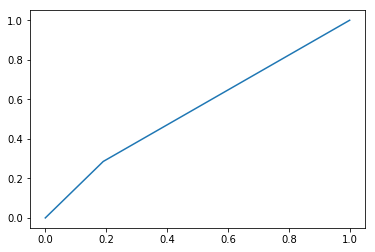

In [79]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, predictions,pos_label=2, sample_weight=None)
plt.plot(fpr,tpr)
plt.show()

In [80]:
import numpy as np
from sklearn.metrics import roc_auc_score
metrics.auc(fpr,tpr)

0.54761904761904756

In [81]:
clf.score(X_train,Y_train,sample_weight=None)*100     

81.226053639846739